# Analyse classes and class labels 
This is the next file to: 
1) get_relative_heights File (read in file and then determine the relative heights and save it)

Now: read in the file including the relative heights and analyse the classes

In [146]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [147]:
%matplotlib inline

## Read file in and prepare to use 

In [148]:
# Define a data frame with all my data# Define  
FILE_PATH = r"../DATA"
FILE_NAME = r"/Cassette_relativeHeight.csv"
IMAGE_FILE_PATH = r"images"
df = pd.read_csv(FILE_PATH+FILE_NAME, delimiter=',')
df.head()

,Unnamed: 0,X,Y,Z,x_origin,y_origin,z_origin,reflectance,theta,id,class,range,relative_height
0,1,1903.382935,21122.490234,38.991180,1907.911133,21121.59375,41.325581,-10.139493,-1.063594,0.0,303040192.0,5.17300,-2.334401
1,2,1903.404541,21122.486328,38.990284,1907.911011,21121.59375,41.325989,-9.909495,-1.061419,0.0,303040192.0,5.15375,-2.335705
2,3,1903.428223,21122.480469,38.990547,1907.910767,21121.59375,41.326397,-9.559498,-1.059231,0.0,303040192.0,5.13200,-2.335850
3,4,1903.451538,21122.476562,38.991211,1907.910645,21121.59375,41.326786,-10.209500,-1.057138,0.0,303040192.0,5.11050,-2.335575
4,5,1903.474854,21122.470703,38.991467,1907.910400,21121.59375,41.327194,-10.499502,-1.054956,0.0,303040192.0,5.08925,-2.335727


In [149]:
# Get rid of first column (was ID-created by Python I assume)
df = df.drop(['Unnamed: 0'], axis=1)
df.head()

,X,Y,Z,x_origin,y_origin,z_origin,reflectance,theta,id,class,range,relative_height
0,1903.382935,21122.490234,38.991180,1907.911133,21121.59375,41.325581,-10.139493,-1.063594,0.0,303040192.0,5.17300,-2.334401
1,1903.404541,21122.486328,38.990284,1907.911011,21121.59375,41.325989,-9.909495,-1.061419,0.0,303040192.0,5.15375,-2.335705
2,1903.428223,21122.480469,38.990547,1907.910767,21121.59375,41.326397,-9.559498,-1.059231,0.0,303040192.0,5.13200,-2.335850
3,1903.451538,21122.476562,38.991211,1907.910645,21121.59375,41.326786,-10.209500,-1.057138,0.0,303040192.0,5.11050,-2.335575
4,1903.474854,21122.470703,38.991467,1907.910400,21121.59375,41.327194,-10.499502,-1.054956,0.0,303040192.0,5.08925,-2.335727


In [150]:
# Convert the two columns ID and CLASS into integer values
df = df.astype({"id": 'int64', "class": 'int64'})
df.head()

,X,Y,Z,x_origin,y_origin,z_origin,reflectance,theta,id,class,range,relative_height
0,1903.382935,21122.490234,38.991180,1907.911133,21121.59375,41.325581,-10.139493,-1.063594,0,303040192,5.17300,-2.334401
1,1903.404541,21122.486328,38.990284,1907.911011,21121.59375,41.325989,-9.909495,-1.061419,0,303040192,5.15375,-2.335705
2,1903.428223,21122.480469,38.990547,1907.910767,21121.59375,41.326397,-9.559498,-1.059231,0,303040192,5.13200,-2.335850
3,1903.451538,21122.476562,38.991211,1907.910645,21121.59375,41.326786,-10.209500,-1.057138,0,303040192,5.11050,-2.335575
4,1903.474854,21122.470703,38.991467,1907.910400,21121.59375,41.327194,-10.499502,-1.054956,0,303040192,5.08925,-2.335727


In [151]:
# Create a subsample to continue working with during the day so Dave can work on his computer 
df = df[:10000]

## Now analyse the classes

In [152]:
rows, columns = df.shape
n_classes = df["class"].value_counts().shape[0]
print "Number of points:", rows
print "Number of attributes:", columns
print "Number of different class labels in the column: class:", n_classes

Number of points: 10000
Number of attributes: 12
Number of different class labels in the column: class: 5


In [153]:
# Returns the classes and how often each value occurs, in descending order for the frequency 
df["class"].value_counts()

203000000    4744
202020000    4025
303040192    1110
202030000      84
202040000      37
Name: class, dtype: int64

In [154]:
# Returns the classes and how often they occur, sorted by the class name 
df.groupby('class').size()

class
202020000    4025
202030000      84
202040000      37
203000000    4744
303040192    1110
dtype: int64

In [155]:
# Gives me the data types that occur 
df.dtypes

X                  float64
Y                  float64
Z                  float64
x_origin           float64
y_origin           float64
z_origin           float64
reflectance        float64
theta              float64
id                   int64
class                int64
range              float64
relative_height    float64
dtype: object

## Introduce categorial values so that it is easier to visualise 
For each class, give it the categorial name 

In [156]:
# This is just to visualise how many points there are for each class 
df['class'].value_counts().tolist()

[4744, 4025, 1110, 84, 37]

In [157]:
# Create a LookUpTable with all class codes that are in the class column (e.g. 0: unclassified)
lut_classCodes = df['class'].unique().tolist()
lut_classCodes.sort()
print type(lut_classCodes)
print lut_classCodes

<type 'list'>
[202020000, 202030000, 202040000, 203000000, 303040192]


In [158]:
# Create a new column in the dataframe and now fill it with categorial data 
df["class_category"] = df["class"]

# This is the whole LUT to use later when I actually process the full data set 
lut_classnames = ["unclassified", "other_ground", "road", "sidewalk", "curb", "building", "other_object", 
                  "x1", "x2", "x3", "x4", "x5", "grid", "pedestrian", "x6", "x7", "x8", "x9", "x10", 
                  "x11", "tree", "potted_plant"]
lut_subset_10000 = ["road", "sidewalk", "curb", "building", "x"]

##########
# IMPORTANT: change that later to run with full dataset  

# Modify that column to visualise it 
if len(lut_classCodes) == len(lut_subset_10000):
    for count, elem in enumerate(lut_classCodes):
        df["class_category"].where(df["class_category"] != elem, lut_subset_10000[count], inplace=True)     
else:
    print("LUT must have same length")

In [159]:
df.head()

,X,Y,Z,x_origin,y_origin,z_origin,reflectance,theta,id,class,range,relative_height,class_category
0,1903.382935,21122.490234,38.991180,1907.911133,21121.59375,41.325581,-10.139493,-1.063594,0,303040192,5.17300,-2.334401,x
1,1903.404541,21122.486328,38.990284,1907.911011,21121.59375,41.325989,-9.909495,-1.061419,0,303040192,5.15375,-2.335705,x
2,1903.428223,21122.480469,38.990547,1907.910767,21121.59375,41.326397,-9.559498,-1.059231,0,303040192,5.13200,-2.335850,x
3,1903.451538,21122.476562,38.991211,1907.910645,21121.59375,41.326786,-10.209500,-1.057138,0,303040192,5.11050,-2.335575,x
4,1903.474854,21122.470703,38.991467,1907.910400,21121.59375,41.327194,-10.499502,-1.054956,0,303040192,5.08925,-2.335727,x


In [160]:
df['class_category'].value_counts()

building    4744
road        4025
x           1110
sidewalk      84
curb          37
Name: class_category, dtype: int64

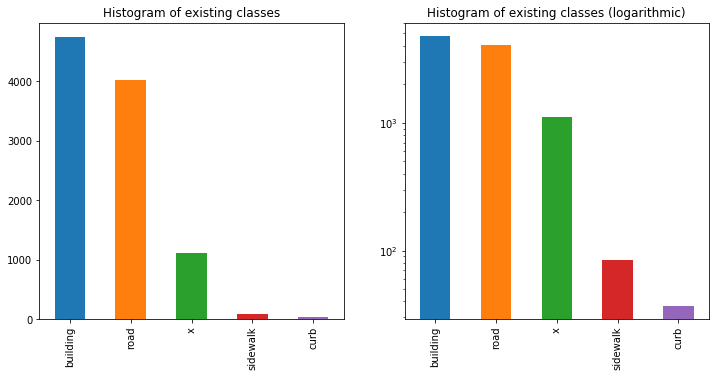

In [166]:
fig = plt.figure(figsize=(12,12))
plt.subplot(221), df['class_category'].value_counts().plot(kind='bar', logy=False, 
                                                           title="Histogram of existing classes")
plt.subplot(222), df['class_category'].value_counts().plot(kind='bar', logy=True, 
                                                           title="Histogram of existing classes (logarithmic)"), plt.show();
# Save the full figure...
fig.savefig(IMAGE_FILE_PATH+'/existing_classes_histo.png')

In [170]:
# Remove the class UNCLASSIFIED because it will bias my classifier 
df = df[df["class"] != 0.0]
df.head()

,X,Y,Z,x_origin,y_origin,z_origin,reflectance,theta,id,class,range,relative_height,class_category
0,1903.382935,21122.490234,38.991180,1907.911133,21121.59375,41.325581,-10.139493,-1.063594,0,303040192,5.17300,-2.334401,x
1,1903.404541,21122.486328,38.990284,1907.911011,21121.59375,41.325989,-9.909495,-1.061419,0,303040192,5.15375,-2.335705,x
2,1903.428223,21122.480469,38.990547,1907.910767,21121.59375,41.326397,-9.559498,-1.059231,0,303040192,5.13200,-2.335850,x
3,1903.451538,21122.476562,38.991211,1907.910645,21121.59375,41.326786,-10.209500,-1.057138,0,303040192,5.11050,-2.335575,x
4,1903.474854,21122.470703,38.991467,1907.910400,21121.59375,41.327194,-10.499502,-1.054956,0,303040192,5.08925,-2.335727,x


## Re-label the classes 
Really, what I have to do now is to re-label the classes so that it is easier to visualise. I need to give the classes values from e.g. 1 - 22 so that I can address them easier 